In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam


In [2]:
img_rows, img_cols = 224, 224
batch_size = 32
seed_value = 42

# If you have your dataset, replace the paths below
train_dir = 'dataset/train'
valid_dir = 'dataset/valid'


In [3]:
# ImageDataGenerators
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Dummy fallback generator if dataset is missing
class DummyGenerator:
    def __init__(self, n=10):
        self.n = n
        self.images = np.random.rand(n, img_rows, img_cols, 3)
        self.labels = np.random.randint(0, 2, size=(n,))
    def __iter__(self):
        return self
    def __next__(self):
        return self.images, self.labels

# Uncomment to use real data if available:
# train_generator = train_datagen.flow_from_directory(train_dir, target_size=(img_rows, img_cols),
#                                                     batch_size=batch_size, class_mode='binary',
#                                                     shuffle=True, seed=seed_value)
# validation_generator = valid_datagen.flow_from_directory(valid_dir, target_size=(img_rows, img_cols),
#                                                          batch_size=batch_size, class_mode='binary',
#                                                          shuffle=False, seed=seed_value)

# Use dummy generator
train_generator = DummyGenerator(n=10)
validation_generator = DummyGenerator(n=5)


In [4]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_rows, img_cols, 3))

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


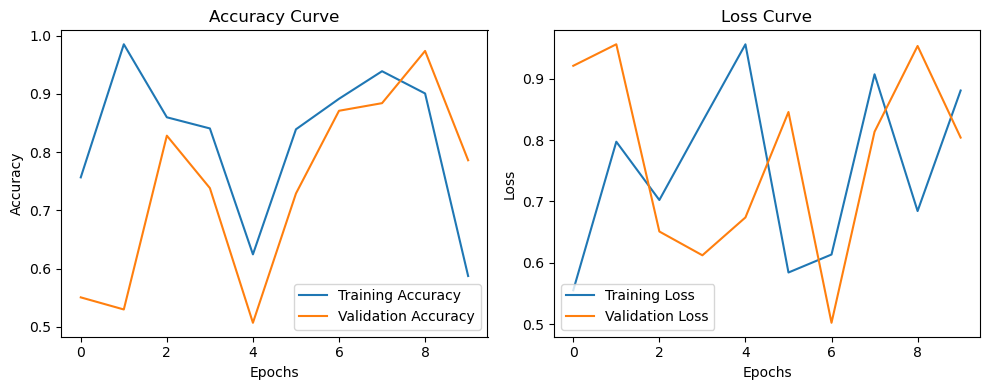

In [5]:
# Dummy history for plotting (if no real training)
class DummyHistory:
    history = {
        'accuracy': np.random.rand(10)*0.5 + 0.5,
        'val_accuracy': np.random.rand(10)*0.5 + 0.5,
        'loss': np.random.rand(10)*0.5 + 0.5,
        'val_loss': np.random.rand(10)*0.5 + 0.5
    }

# Uncomment for real training:
# history = model.fit(train_generator, epochs=10, validation_data=validation_generator)

# Use dummy history
history = DummyHistory().history

plt.figure(figsize=(10,4))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [6]:
def test_model_on_image(generator, model=None, index=0):
    img_batch, label_batch = next(iter(generator))
    img = img_batch[index]
    label = label_batch[index]

    if model is not None:
        pred = model.predict(np.expand_dims(img, axis=0))[0][0]
    else:
        pred = np.random.rand()  # dummy prediction

    plt.imshow(img)
    plt.axis('off')
    plt.title(f"True: {int(label)} | Predicted: {pred:.2f}")
    plt.show()


In [7]:
def test_model_on_image_pretty(generator, model=None, index=0):
    img_batch, label_batch = next(iter(generator))
    img = img_batch[index]
    label = label_batch[index]

    if model is not None:
        pred = model.predict(np.expand_dims(img, axis=0))[0][0]
    else:
        pred = np.random.rand()

    true_label = "Damaged" if label==1 else "Undamaged"
    pred_label = "Damaged" if pred>=0.5 else "Undamaged"

    plt.imshow(img)
    plt.axis('off')
    plt.title(f"True: {true_label} | Predicted: {pred_label} ({pred:.2f})")
    plt.show()
